In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
trainData = pd.read_csv("E:/IT Engg/5th sem/ML/temperatures.csv") 
trainData.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [3]:
trainData.dtypes 
trainData.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [4]:
trainData.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [5]:
trainData.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

<AxesSubplot:title={'center':'Top 10 temperature records'}, xlabel='YEAR', ylabel='ANNUAL'>

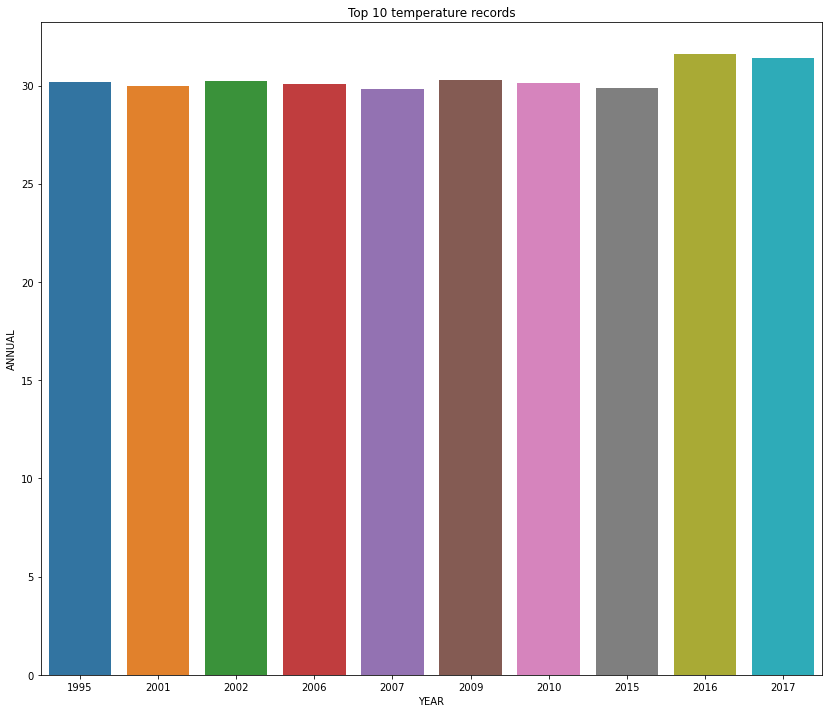

In [6]:
top_10_data = trainData.nlargest(10, "ANNUAL")
plt.figure(figsize=(14,12))
plt.title("Top 10 temperature records")
sns.barplot(x=top_10_data.YEAR, y=top_10_data.ANNUAL)

In [7]:
from sklearn import linear_model, metrics
trainData.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [8]:
X=trainData[["YEAR"]] 
Y=trainData[["JAN"]]

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
len(X_train)

93

In [10]:
len(X_test)

24

In [11]:
trainData.shape

(117, 18)

In [12]:
reg = linear_model.LinearRegression()
print(X_train)

     YEAR
56   1957
94   1995
35   1936
38   1939
93   1994
..    ...
9    1910
72   1973
12   1913
107  2008
37   1938

[93 rows x 1 columns]


In [13]:
model = reg.fit(X_train, Y_train)

In [14]:
r_sq = reg.score(X_train, Y_train)
print("Determination coefficient:", r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Determination coefficient: 0.35480458491221156
Intercept: [-5.35338281]
Slope: [[0.01486008]]


In [15]:
Y_pred = model.predict(X_test) 
print('predicted response:', Y_pred, sep='\n')

predicted response:
[[23.92097555]
 [23.5791937 ]
 [23.75751466]
 [24.58967916]
 [23.98041587]
 [24.35191788]
 [23.35629249]
 [23.68321426]
 [23.86153523]
 [24.32219772]
 [24.30733764]
 [24.3370578 ]
 [22.92535016]
 [23.81695498]
 [24.53023884]
 [23.71293442]
 [24.42621828]
 [24.38163804]
 [23.87639531]
 [23.54947354]
 [24.03985619]
 [23.14825137]
 [24.09929651]
 [23.99527595]]


InvalidIndexError: (slice(None, None, None), None)

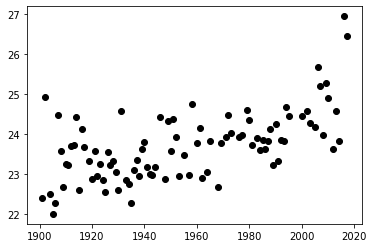

In [16]:
plt.scatter(X_train, Y_train, color='black')
plt.plot(X_train, reg.predict(X_train), color='blue', linewidth=3)
plt.title("Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature") 
plt.show()

InvalidIndexError: (slice(None, None, None), None)

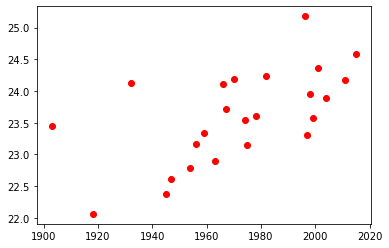

In [20]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, reg.predict(X_test), color='black', linewidth=3)
plt.title("Temperature vs Year") 
plt.xlabel("Year") 
plt.ylabel("Temperature") 
plt.show()

In [18]:
mse = np.sum((Y_pred - Y_test)**2) 
rmse = np.sqrt(mse/24) 
print("Mean Squared Error(MSE):", mse)
print("Root Mean Squared Error(RMSE):", rmse)

Mean Squared Error(MSE): JAN    10.737906
dtype: float64
Root Mean Squared Error(RMSE): JAN    0.668889
dtype: float64


In [19]:
SSR = np.sum((Y_pred - Y_test)**2) 
SST = np.sum((Y_test - np.mean(Y_test))**2) 
r2_score = 1 - (SSR/SST) 
print('SST:', SST)
print('SSR', SSR)
print('R2 square:', r2_score)

SST: JAN    12.452996
dtype: float64
SSR JAN    10.737906
dtype: float64
R2 square: JAN    0.137725
dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
